In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
from DynLinEcon import DLE
%matplotlib inline

//anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


# Lucas Asset Pricing Using DLE

This notebook shows how the DLE class can be used to price linear functions of the economy's state vector, as well as risk-free assets (which pay out one unit of the first consumption good with certainty).

Knowledge of the basic economic environment is assumed. See the notebook "Growth in Dynamic Linear Economies" for more details.

We use a linear-quadratic version of an economy that Lucas(1978) used to develop an equilibrium theory of asset prices:

** Preferences **
$$ -\frac{1}{2}\mathbb{E}\sum_{t=0}^\infty \beta^t[(c_t - b_t)^2 + l_t^2]|J_0 $$
$$s_t = c_t$$
$$b_t = U_bz_t$$

** Technology **
$$ c_t = d_{1t} $$
$$ k_t = \delta_k k_{t-1} + i_t $$
$$ g_t = \phi_1 i_t \, , \phi_1 > 0 $$
$$ \left[ {\begin{array}{c}
   d_{1t} \\ 0
   \end{array} } 
   \right] = U_dz_t $$

** Information **
$$ z_{t+1} = 
\left[ {\begin{array}{ccc}
   1 & 0 & 0 \\ 0 & 0.8 & 0 \\ 0 & 0 & 0.5 
   \end{array} } 
   \right]
   z_t + 
    \left[ {\begin{array}{cc}
   0 & 0 \\ 1 & 0 \\ 0 & 1
   \end{array} } 
   \right]
   w_{t+1} $$
   
   $$ U_b = 
   \left[ {\begin{array}{ccc}
   30 & 0 & 0
   \end{array} } 
   \right]$$
   $$U_d = 
   \left[ {\begin{array}{ccc}
   5 & 1 & 0 \\ 0 & 0 & 0
   \end{array} } 
   \right]$$
$$x_0 = 
   \left[ {\begin{array}{ccccc}
   5 & 150 & 1 & 0 & 0
   \end{array} } 
   \right]'
$$

### Asset Pricing Equations

HS2013 show that the time t value of a permanent claim to a stream $y_s = U_ax_s \, , s \geq t$ is:
$$ a_t = (x_t'\mu_ax_t + \sigma_a)/(\bar e _1M_cx_t) $$

With: 
$$ \mu_a = \sum_{\tau = 0}^\infty \beta^\tau(A^{o'})^\tau Z_a A^{o\tau} $$
$$ \sigma_a = \frac{\beta}{1-\beta} \text{trace} (Z_a \sum_{\tau = 0}^\infty \beta^\tau (A^{o})^\tau C C^{'} (A^{o'})^\tau)$$
Where:
$$ Z_a = U_a^{'}M_c $$

(The use of $\bar e _1$ indicates that the first consumption good set as the numeraire).

### Asset Pricing Simulations

In [2]:
gam=0
gamma = np.array([[gam],[0]])
phic = np.array([[1],[0]])
phig = np.array([[0],[1]])
phi1=.00001
phii = np.array([[0],[-phi1]])
deltak=np.array([[.95]])
thetak=np.array([[1]])
beta= np.array([[1/1.05]])
ud = np.array([[5,1,0],[0,0,0]])
a22 = np.array([[1,0,0],[0,0.8,0],[0,0,0.5]])
c2 = np.array([[0,0.5,0],[0,0,1]]).T
llambda=np.array([[0]])
pih=np.array([[1]])
deltah=np.array([[.9]])
thetah=np.array([[1]])-deltah
ub=np.array([[30,0,0]])
x0=np.array([[5,150,1,0,0]]).T

Info1 = (a22,c2,ub,ud)
Tech1 = (phic,phig,phii,gamma,deltak,thetak)
Pref1 = (beta,llambda,pih,deltah,thetah)

In [3]:
Econ1 = DLE(Info1, Tech1, Pref1)

We created the economy as normal above. Next we simulate the economy, specifying a "Pay" matrix. The particular choice of "Pay" used below means that we are pricing a perpetual claim on the endowment process $d_{1t}$.

In [4]:
Econ1.compute_sequence(x0,ts_length = 100, Pay = np.array([Econ1.Sd[0,:]]))

The first plot shows the price of this claim over time:

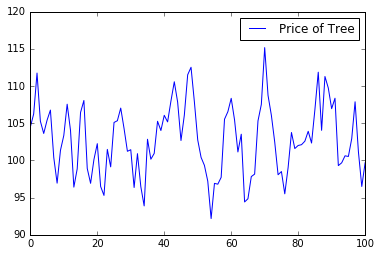

In [5]:
### Fig 7.12.1 from p.147 of HS2013
plt.plot(Econ1.Pay_Price, label='Price of Tree')
plt.legend(loc='Best')

The next plot displays the realized gross rate of return on this "Lucas tree" as well as on a risk-free one-period bond:

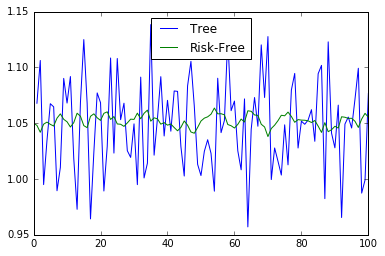

In [6]:
### Left panel of Fig 7.12.2 from p.148 of HS2013
plt.plot(Econ1.Pay_Gross, label='Tree')
plt.plot(Econ1.R1_Gross, label='Risk-Free')
plt.legend(loc='Best')

In [7]:
np.corrcoef(Econ1.Pay_Gross[1:,0],Econ1.R1_Gross[1:,0])

array([[ 1.        , -0.52807902],
       [-0.52807902,  1.        ]])

Above we have also calculated the correlation coefficient between these two returns.

To give an idea of how the term structure of interest rates moves in this economy, the next plot displays the *net* rates of return on one-period and five-period risk-free bonds:

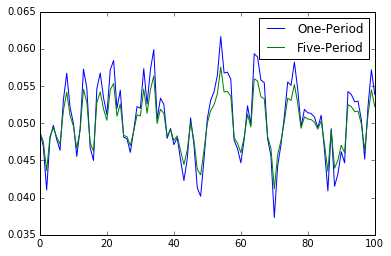

In [8]:
### Right panel of Fig 7.12.2 from p.148 of HS2013
plt.plot(Econ1.R1_Net, label='One-Period')
plt.plot(Econ1.R5_Net, label='Five-Period')
plt.legend(loc='Best')

From the above plot, we can see the tendency of the term structure to slope up when rates are low, and to slope down when rates are high. Comparing it to the previous plot of the price of the "Lucas tree", we can also see that net rates of return are low when the price of the tree is high, and vice versa.

We now plot the realized gross rate of return on a "Lucas tree" as well as on a risk-free one-period bond when the autoregressive parameter for the endowment process is reduced to 0.4:

In [9]:
a22_2 = np.array([[1,0,0],[0,0.4,0],[0,0,0.5]])
Info2 = (a22_2,c2,ub,ud)

Econ2 = DLE(Info2, Tech1, Pref1)
Econ2.compute_sequence(x0,ts_length = 100, Pay = np.array([Econ2.Sd[0,:]]))

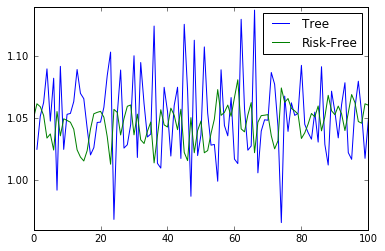

In [10]:
### Left panel of Fig 7.12.3 from p.148 of HS2013
plt.plot(Econ2.Pay_Gross, label='Tree')
plt.plot(Econ2.R1_Gross, label='Risk-Free')
plt.legend(loc='Best')

In [11]:
np.corrcoef(Econ2.Pay_Gross[1:,0],Econ2.R1_Gross[1:,0])

array([[ 1.        , -0.65364604],
       [-0.65364604,  1.        ]])

The correlation between these two gross rates is now more negative. 

Next, we again plot the *net* rates of return on one-period and five-period risk-free bonds:

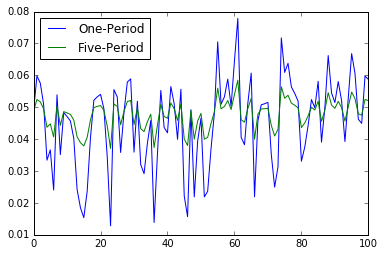

In [12]:
### Right panel of Fig 7.12.3 from p.148 of HS2013
plt.plot(Econ2.R1_Net, label='One-Period')
plt.plot(Econ2.R5_Net, label='Five-Period')
plt.legend(loc='Best')

We can see the tendency of the term structure to slope up when rates are low (and down when rates are high) has been accentuated relative to the first economy.